In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('./funda_train.csv')

In [15]:
temp = train[(train['transacted_date'] >= '2018-03-01') & (train['transacted_date'] <= '2018-05-31')]
temp_groupby = temp.groupby(['store_id'])['amount'].sum()

In [24]:
a = [1, 2, 3, 4]

In [25]:
a[0]

1

In [29]:
s = pd.Series([1, 2, 3, 4], index=['A', 'B', 'C', 'D'])

In [33]:
s = {'A': 1, 'B':2, 'C':3, 'D':4}

In [34]:
s['A']

1

In [35]:
s['A']

1

In [40]:
type(temp_groupby.reset_index())

pandas.core.frame.DataFrame

In [14]:
baseline = temp_groupby.reset_index()

In [7]:
# list(train['store_id'].unique())

In [9]:
# list(baseline['store_id'].unique())

In [48]:
# train[train['store_id'] == 2119]

In [52]:
for i in [1, 2, 3]:
    print(i)

1
2
3


# 풀이1

In [73]:
set(train['store_id']) - set(baseline['store_id'])

{271, 279, 515, 588, 706, 795, 999, 1379, 1435, 2081, 2094, 2119}

# 풀이2

In [58]:
train[~train['store_id'].isin(list(baseline['store_id'].unique()))]['store_id'].unique()

array([ 271,  279,  515,  588,  706,  795,  999, 1379, 1435, 2081, 2094,
       2119])

In [59]:
baseline_storeid = list(baseline['store_id'].unique())

In [61]:
# baseline_storeid

In [67]:
missing = train[~train['store_id'].isin(baseline_storeid)]

In [69]:
missing['store_id'].unique()

array([ 271,  279,  515,  588,  706,  795,  999, 1379, 1435, 2081, 2094,
       2119])

# 풀이 3

In [70]:
train_id_list = list(train['store_id'].unique())
baseline_id_list = list(baseline['store_id'].unique())

In [71]:
missing = []
for i in train_id_list:
    if i not in baseline_id_list:
        missing.append(i)
print(missing)

[271, 279, 515, 588, 706, 795, 999, 1379, 1435, 2081, 2094, 2119]


# 새로운 아이디어

# 1. 2019년 1월부터 2월까지 매출의 합 / 59(일)) * 92
# 2. 92일동안 월, 화, 수, 목, 금, 토, 일 갯수를 구해서 
가지고 있는 데이터로 store_id 271번 월 50만원, 화 20만원, 수 60만원.... , 일 100만원
92일 동안 월요일 13번, 화 12번, 수 13번... , 일 14번.
50만원 * 13, 20만원 * 12 .... store_id 92일동안 = 

In [ ]:
[1, 2, 3, 4]

# 미래의 요일 계산하기

In [106]:
dates = list(pd.date_range(start='20190301', end='20190531'))

In [110]:
dates_df = pd.DataFrame(dates)

In [112]:
dates_df.columns = ['future']

In [1]:
dates_df['weekday'] = dates_df['future'].apply(lambda x: x.weekday())

NameError: name 'dates_df' is not defined

In [127]:
dates_df

,future,weekday
0,2019-03-01,4
1,2019-03-02,5
2,2019-03-03,6
3,2019-03-04,0
4,2019-03-05,1
5,2019-03-06,2
6,2019-03-07,3
7,2019-03-08,4
8,2019-03-09,5
9,2019-03-10,6


In [94]:
dates = list(pd.date_range(start='20190301', end='20190531').astype('str'))

In [98]:
dates_df = pd.DataFrame(dates)
dates_df.columns = ['future']

In [101]:
dates_df['weekday'] = pd.to_datetime(dates_df['future']).apply(lambda x: x.weekday())

In [102]:
dates_df

,future,weekday
0,2019-03-01,4
1,2019-03-02,5
2,2019-03-03,6
3,2019-03-04,0
4,2019-03-05,1
5,2019-03-06,2
6,2019-03-07,3
7,2019-03-08,4
8,2019-03-09,5
9,2019-03-10,6


In [88]:
dates_meta = list(pd.date_range(start='20190301', end='2019-05-31').astype(str))

In [89]:
dates_meta

['2019-03-01',
 '2019-03-02',
 '2019-03-03',
 '2019-03-04',
 '2019-03-05',
 '2019-03-06',
 '2019-03-07',
 '2019-03-08',
 '2019-03-09',
 '2019-03-10',
 '2019-03-11',
 '2019-03-12',
 '2019-03-13',
 '2019-03-14',
 '2019-03-15',
 '2019-03-16',
 '2019-03-17',
 '2019-03-18',
 '2019-03-19',
 '2019-03-20',
 '2019-03-21',
 '2019-03-22',
 '2019-03-23',
 '2019-03-24',
 '2019-03-25',
 '2019-03-26',
 '2019-03-27',
 '2019-03-28',
 '2019-03-29',
 '2019-03-30',
 '2019-03-31',
 '2019-04-01',
 '2019-04-02',
 '2019-04-03',
 '2019-04-04',
 '2019-04-05',
 '2019-04-06',
 '2019-04-07',
 '2019-04-08',
 '2019-04-09',
 '2019-04-10',
 '2019-04-11',
 '2019-04-12',
 '2019-04-13',
 '2019-04-14',
 '2019-04-15',
 '2019-04-16',
 '2019-04-17',
 '2019-04-18',
 '2019-04-19',
 '2019-04-20',
 '2019-04-21',
 '2019-04-22',
 '2019-04-23',
 '2019-04-24',
 '2019-04-25',
 '2019-04-26',
 '2019-04-27',
 '2019-04-28',
 '2019-04-29',
 '2019-04-30',
 '2019-05-01',
 '2019-05-02',
 '2019-05-03',
 '2019-05-04',
 '2019-05-05',
 '2019-05-

In [ ]:
pd.concat([df, df1, df2])

In [ ]:
pd.concat([baseline, missing])

In [79]:
train['weekday'] = pd.to_datetime(train['transacted_date']).apply(lambda x: x.weekday())

In [75]:
temp_groupby

store_id
0       2.171000e+06
1       2.977143e+05
2       9.461429e+05
4       2.475643e+06
5       1.111857e+06
            ...     
2132    2.518143e+06
2133    1.418629e+06
2134    5.340714e+05
2135    1.491000e+06
2136    6.743929e+06
Name: amount, Length: 1955, dtype: float64

In [76]:
# pd.concat([df, df1])

# 데이터 읽기

In [77]:
train = pd.read_csv('./Data/Dacon/funda_train.csv')

# 작년 같은 기간 매출로 올해 매출 예상하기

In [5]:
temp = train[(train['transacted_date'] >= '2018-03-01') & (train['transacted_date'] <= '2018-05-31')]

In [104]:
submission = temp.groupby('store_id')['amount'].sum()

# 모든 store_id를 다 제출하셨나요?

# 2018년 3월부터 5월 사이에는 영업기록이 없지만, 데이터에는 들어있는 가게들의 이력을 살펴봅시다.

In [27]:
store_ids = list(temp['store_id'].unique())

In [29]:
exceptions = [i for i in list(train['store_id'].unique()) if i not in store_ids]

In [111]:
len(exceptions)

17

In [33]:
exceptions_df = train[train['store_id'].isin(exceptions)]

In [113]:
exceptions_df['store_id'].nunique()

17

In [35]:
exceptions_df.groupby(['store_id']).agg({'transacted_date':['min', 'max']})

transacted_date            
                     min         max
store_id                            
271           2016-06-01  2019-02-28
279           2016-06-03  2019-02-02
515           2016-10-12  2019-02-26
588           2016-06-01  2019-02-25
594           2016-08-19  2019-02-28
706           2016-06-01  2019-02-27
795           2017-03-15  2019-02-28
999           2016-06-01  2018-02-08
1152          2016-06-02  2019-02-28
1190          2016-10-10  2019-02-28
1330          2016-06-01  2019-02-28
1379          2016-09-29  2019-02-28
1435          2016-08-09  2019-02-27
2081          2016-07-08  2019-02-28
2094          2016-11-10  2019-02-27
2119          2017-03-23  2018-02-27
2126          2017-03-31  2019-02-27

# Make meta information

In [67]:
dates_meta = list(pd.date_range(start='20160601', end='2019-02-28').astype(str))

In [69]:
storeid_meta = list(train['store_id'].unique())

In [73]:
meta = pd.DataFrame([(i, j) for i in dates_meta for j in storeid_meta], columns=['date', 'store_id'])

In [78]:
train_meta = meta.merge(train, how='left', left_on=['date', 'store_id'], right_on=['transacted_date', 'store_id'])

In [82]:
train_meta['amount'] = train_meta['amount'].fillna(0)

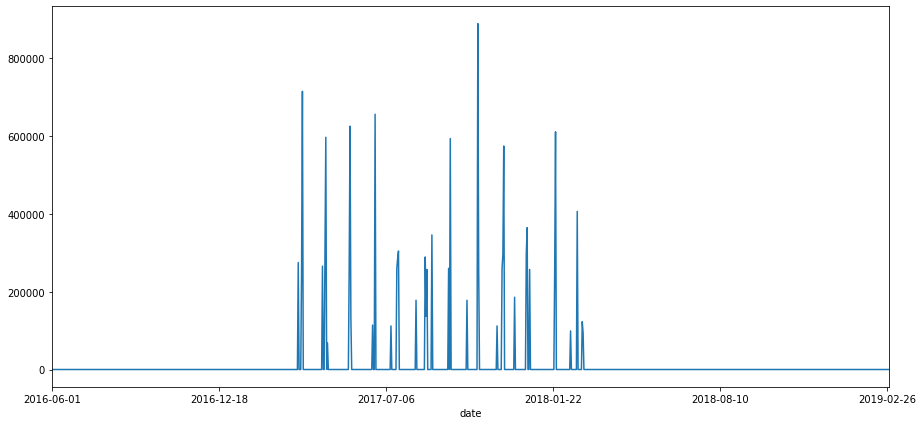

In [99]:
train_meta[train_meta['store_id'] == 2119].groupby(['date'])['amount'].sum().plot(figsize=(15,7))

# exception 들에 대해서 가장 최근 두달간 일평균매출액을 기준으로 계산해서 넣어주자.

In [117]:
exceptions_recent = exceptions_df[(exceptions_df['transacted_date'] >= '2019-02-01') & (exceptions_df['transacted_date'] <= '2019-02-28')]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [118]:
exceptions_submission = exceptions_recent.groupby('store_id')['amount'].sum() * 92 / 28

In [119]:
exceptions_submission

store_id
271     7.778558e+06
279     1.694490e+05
515     5.811020e+04
588     9.425306e+04
594     1.809490e+06
706     5.891286e+05
795     0.000000e+00
1152    3.652306e+05
1190    1.268755e+06
1330    5.144490e+05
1379    1.852204e+06
1435    1.314286e+06
2081    1.496267e+06
2094    3.900612e+05
2126    3.809082e+05
Name: amount, dtype: float64

In [120]:
len(submission)

1950

In [121]:
len(exceptions_submission)

15

In [122]:
pd.concat([exceptions_submission, submission]).to_csv('./submission.csv')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# 요일별 평균으로 계산해줘도 되지 않을까?